# P5 Segmentez des clients d'un site e-commerce

![alt text](DataBase_SQL.png "Title")



In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime
sns.set_theme(style="darkgrid")


# Importation

In [2]:
dataset_list = [
    'olist_order_reviews_dataset.csv.zip',
    'olist_customers_dataset.csv.zip',
    'olist_geolocation_dataset.csv.zip',
    'olist_order_items_dataset.csv.zip',
    'olist_order_payments_dataset.csv.zip'  ,
    'olist_orders_dataset.csv.zip',
    'olist_products_dataset.csv.zip',
    'olist_sellers_dataset.csv',
    'product_category_name_translation.csv'
]

data_name_list = [
    'order_reviews',
    'customers',
    'geolocalisation',
    'order_items',
    'order_payments',
    'orders',
    'products',
    'sellers',
    'translation'
]

data =   {key : pd.read_csv(path) for key,path in zip(data_name_list, dataset_list)}


# Importation rfm_reviews

In [3]:
rfm_reviews = pd.read_pickle('rfm_reviews.pkl')
rfm_reviews.head()

,customer_unique_id,r,f,m,rq,fq,mq,score,log_r,log_f,log_m,review_score
0,0000366f3b9a7992bf8c76cfdf3221e2,1845.0,1,141.90,2,0,1,201,7.520235,0.0,4.955123,5.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1848.0,1,27.19,2,0,0,200,7.521859,0.0,3.302849,4.0
2,0000f46a3911fa3c0805444483337064,2271.0,1,86.22,0,0,1,001,7.727976,0.0,4.456902,3.0
3,0000f6ccb0745a6a4b88665a16c9f078,2055.0,1,43.62,0,0,0,000,7.628031,0.0,3.775516,4.0
4,0004aac84e0df4da2b147fca70cf8255,2022.0,1,196.89,0,0,2,002,7.611842,0.0,5.282645,5.0


## K means

In [4]:
# conda install -c conda-forge yellowbrick

In [4]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [5]:
rfm_reviews.isna().sum()

customer_unique_id    0
r                     0
f                     0
m                     0
rq                    0
fq                    0
mq                    0
score                 0
log_r                 0
log_f                 0
log_m                 0
review_score          0
dtype: int64

In [6]:
X = np.array(rfm_reviews[['log_r','log_f','log_m','review_score']]) # On utilise la version log rfm

In [7]:
#X = np.array(rfm[['r','f','m']]) # normal

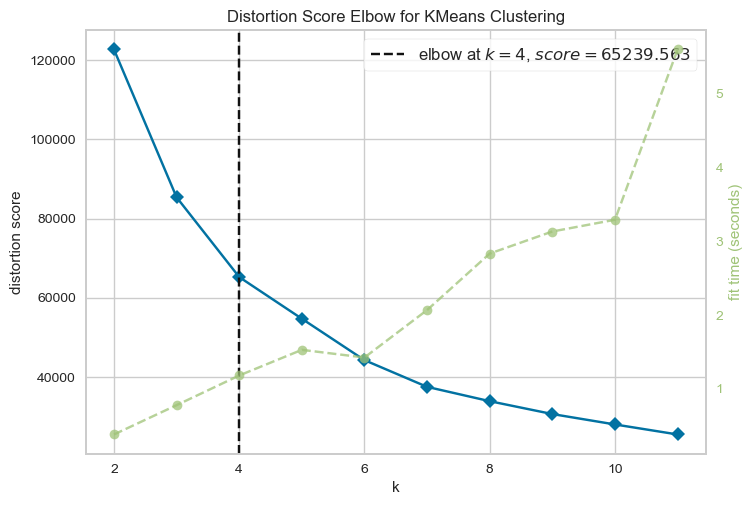

In [8]:

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

plt.show()

# Score Silhouette

In [74]:
from sklearn.metrics import silhouette_score

for n_clusters in range(2,8):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.5560896148632841)
For n_clusters = 3, silhouette score is 0.39915428801636127)
For n_clusters = 4, silhouette score is 0.4217026064623701)
For n_clusters = 5, silhouette score is 0.40960304634454936)
For n_clusters = 6, silhouette score is 0.4052153420169113)
For n_clusters = 7, silhouette score is 0.425119190720026)


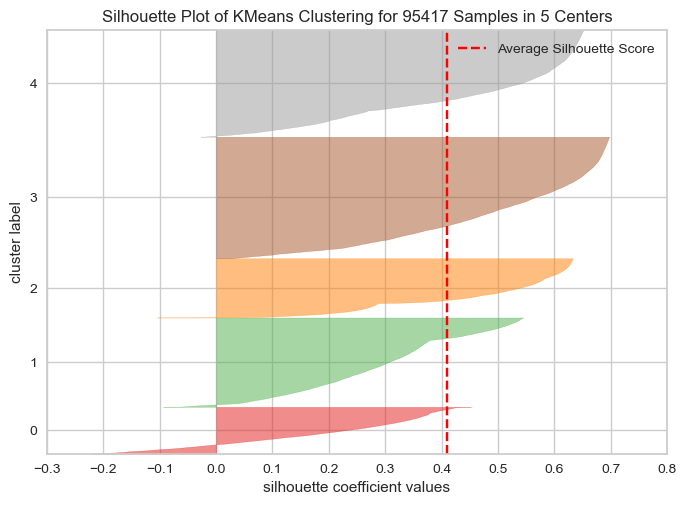

In [9]:
model = KMeans(5)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

plt.show()

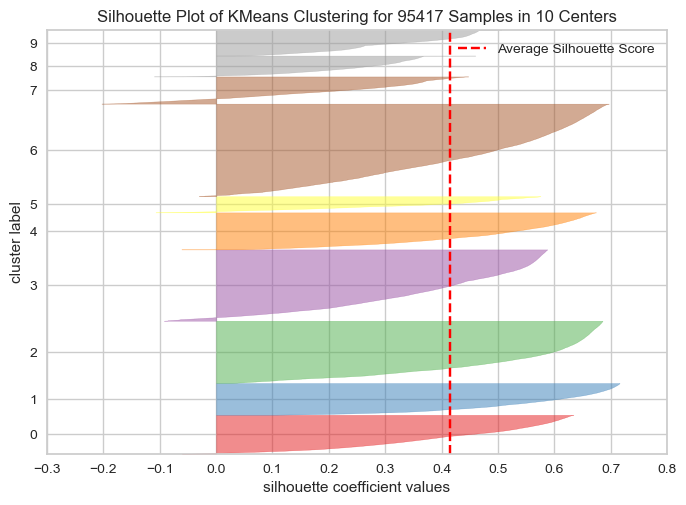

In [76]:
model = KMeans(10)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

plt.show()

In [77]:
rfm.describe()

,r,f,m,log_r,log_f,log_m
count,95417.000000,95417.000000,95417.000000,95417.000000,95417.000000,95417.000000
mean,1967.501493,1.232453,212.832013,7.581540,0.129081,4.802822
std,153.151645,0.823065,641.769353,0.076893,0.332974,0.916200
min,1729.000000,1.000000,10.070000,7.455298,0.000000,2.309561
25%,1843.000000,1.000000,63.910000,7.519150,0.000000,4.157476
50%,1948.000000,1.000000,113.150000,7.574558,0.000000,4.728714
75%,2077.000000,1.000000,202.540000,7.638680,0.000000,5.310937
max,2453.000000,75.000000,109312.640000,7.805067,4.317488,11.601967


In [78]:
# model = KMeans(n_clusters = 7, random_state=2023).fit(X)
# y_pred = model.predict(X)
# plt.scatter(X[:,0],X[:,1],c= y_pred)
# plt.show()

# ACP 

In [79]:
# X = rfm[['r','f','m']]
# X = np.array(X)

In [12]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [81]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(X_scaled)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.37117428 0.25242609]
0.6236003696511185


In [10]:
model = KMeans(n_clusters = 5, random_state=2023).fit(X)
y_pred = model.predict(X)
rfm_reviews['cluster'] = y_pred

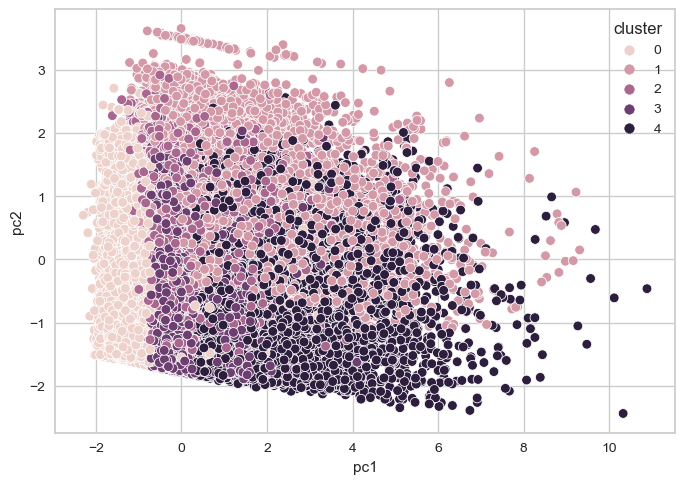

In [83]:
tmp = pd.DataFrame(pca.transform(X_scaled))
tmp.columns = ['pc1','pc2']
tmp['cluster'] = y_pred
sns.scatterplot(data=tmp, x='pc1',y='pc2',hue='cluster')
plt.show()

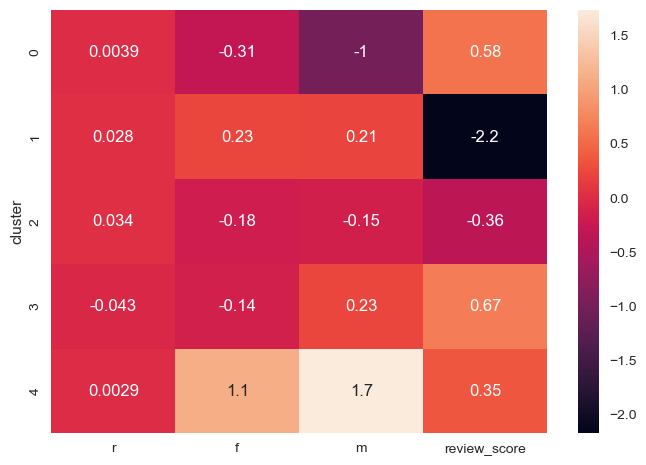

In [84]:

tmp = pd.DataFrame(X_scaled)
tmp.columns = ['r','f','m','review_score']
tmp['cluster'] = y_pred
tmp = tmp.groupby('cluster').mean()
sns.heatmap(tmp,annot=True)
plt.show()

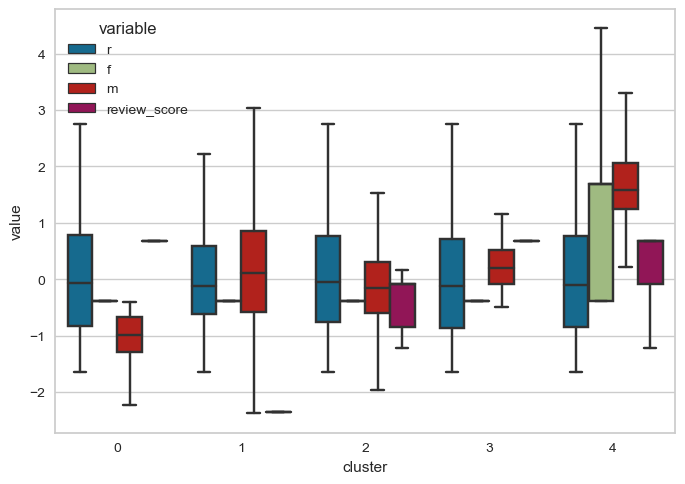

In [85]:

tmp = pd.DataFrame(X_scaled)
tmp.columns = ['r','f','m','review_score']
tmp['cluster'] = y_pred
tmp2 = pd.melt(frame = tmp, id_vars='cluster')

sns.boxplot(data=tmp2, x='cluster',y='value',hue='variable',showfliers=False)
plt.show()


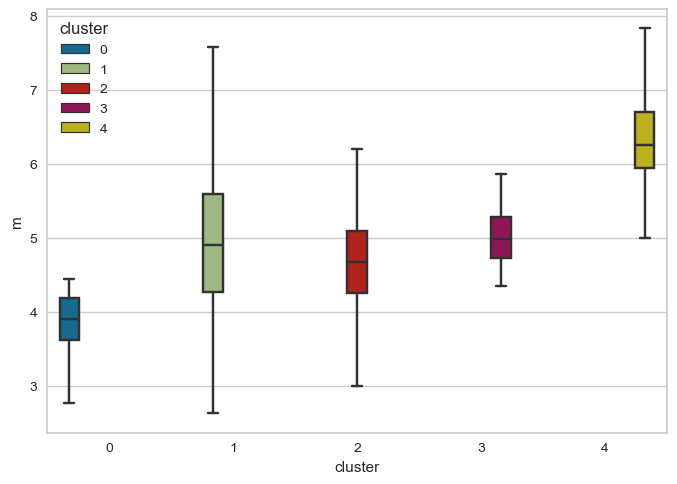

In [86]:
tmp = pd.DataFrame(X)
tmp.columns = ['r','f','m','review_score']
tmp['cluster'] = y_pred


sns.boxplot(data=tmp,
            x='cluster',
            y='m',
            hue='cluster',
            showfliers=False)
plt.show()


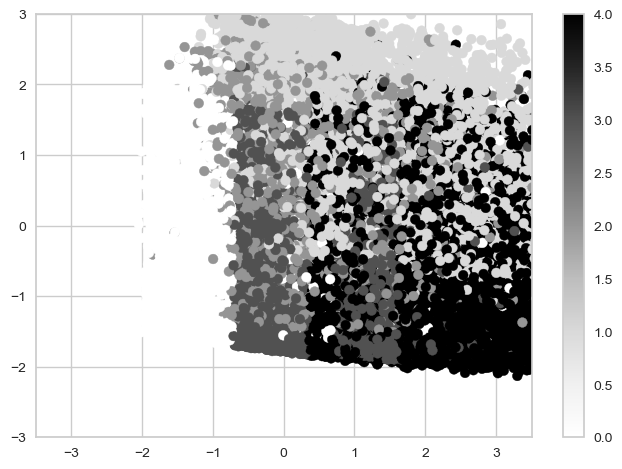

In [87]:
# projeter X sur les composantes principales
X_projected = pca.transform(X_scaled)

# afficher chaque observation
plt.scatter(X_projected[:, 0], X_projected[:, 1],
            c=y_pred)

plt.xlim([-3.5, 3.5])
plt.ylim([-3, 3])
plt.colorbar()
plt.show()

# TSNE 

In [88]:
from sklearn.manifold import TSNE

In [89]:
X_embedded = TSNE(n_components=2, learning_rate='auto',
               init='random', perplexity=3).fit_transform(X_scaled)

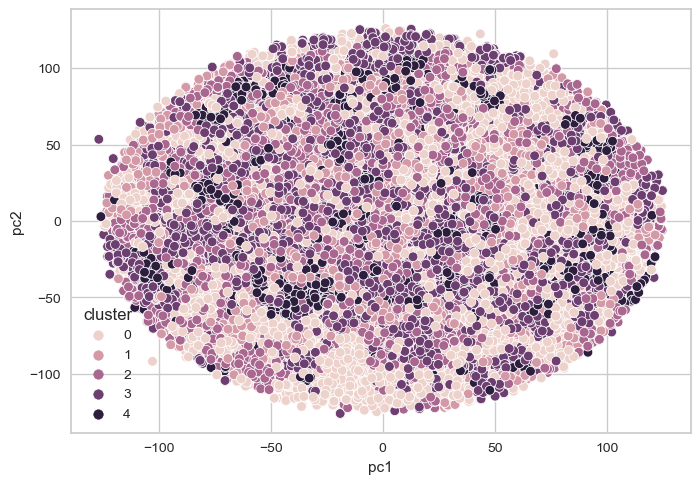

In [90]:
tmp = pd.DataFrame(X_embedded)
tmp.columns = ['pc1','pc2']
tmp['cluster'] = y_pred
sns.scatterplot(data=tmp, x='pc1',y='pc2',hue='cluster')
plt.show()

In [64]:
rfm_reviews

,customer_unique_id,r,f,m,rq,fq,mq,score,log_r,log_f,log_m,review_score,cluster,cluster_dbscan
0,0000366f3b9a7992bf8c76cfdf3221e2,1840.0,1,141.90,2,0,1,201,7.517521,0.000000,4.955123,5.0,3,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1843.0,1,27.19,2,0,0,200,7.519150,0.000000,3.302849,4.0,0,0
2,0000f46a3911fa3c0805444483337064,2266.0,1,86.22,0,0,1,001,7.725771,0.000000,4.456902,3.0,2,0
3,0000f6ccb0745a6a4b88665a16c9f078,2050.0,1,43.62,0,0,0,000,7.625595,0.000000,3.775516,4.0,0,0
4,0004aac84e0df4da2b147fca70cf8255,2017.0,1,196.89,0,0,2,002,7.609367,0.000000,5.282645,5.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95412,fffcf5a5ff07b0908bd4e2dbc735a684,2176.0,2,4134.84,0,1,2,012,7.685244,0.693147,8.327204,5.0,4,1
95413,fffea47cd6d3cc0a88bd621562a9d061,1991.0,1,84.58,1,0,1,101,7.596392,0.000000,4.437698,4.0,2,0
95414,ffff371b4d645b6ecea244b27531430a,2297.0,1,112.46,0,0,1,001,7.739359,0.000000,4.722598,5.0,3,0
95415,ffff5962728ec6157033ef9805bacc48,1848.0,1,133.69,2,0,1,201,7.521859,0.000000,4.895524,5.0,3,0


# DBSCAN 

In [10]:
from sklearn.cluster import DBSCAN

In [13]:
X_scaled

array([[-0.83257923, -0.38766146,  0.16623193,  0.67305095],
       [-0.81139257, -0.38766146, -1.6371747 , -0.08220213],
       [ 1.8757351 , -0.38766146, -0.37756066, -0.8374552 ],
       ...,
       [ 2.05244494, -0.38766146, -0.08756209,  0.67305095],
       [-0.77615799, -0.38766146,  0.10118153,  0.67305095],
       [ 1.5679427 , -0.38766146, -0.58097345,  0.67305095]])

In [14]:
clustering = DBSCAN(eps=0.5, min_samples=5).fit(X_scaled)

In [17]:
rfm_reviews['cluster_dbscan'] = clustering.labels_

clustering.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [18]:
np.unique(clustering.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int64)

### On a autant de cluster avec Dbscan que de segmentation RFM

# CAH

In [21]:
from sklearn.cluster import AgglomerativeClustering

In [59]:
X_scaled[0:20000].shape

(20000, 4)

In [62]:
%%time    
y_pred = AgglomerativeClustering(n_clusters = 5).fit_predict(X_scaled[0:35000])

Wall time: 37.4 s


In [60]:
y_pred.shape

(20000,)

In [52]:
# # Visualisation du résultat
# plt.figure(figsize = (5,5))
# plt.scatter(X['abscisse'],X['ordonnée'],c = y_pred);

# Interprétation des classes et clusters

In [ ]:
# NP where faire les segments
# compare avec crosstab et cluster 
# heatmap

In [31]:
# Nouvelle colonne pour segment
rfm_reviews['segment'] = rfm_reviews['score']

![alt text](Capture_ecran_RFM_segment.png "Title")

## On créait nos segments en s'inspirant de la documentation ci-dessus

In [86]:
champions = ['222']
loyal_customers = ['212','112','121','221','122','211']
#Potentiel_loyalist = ['1']
new_customers = ['200','201',"202"]
promising = ['100','111','101','220','210','102','120']
at_risk = ['012','021','011']
can_not_lose_them = ['022']
hibernating = ['110','010','020']
lost_or_casual = ['000','001','002']

mon_dic = {'champions' : champions,
           'loyal_customers' : loyal_customers,
           'new_customers' : new_customers,
           'promising' : promising,
           'at_risk' : at_risk,
           'can_not_lose_them' : can_not_lose_them,
           'lost_or_casual' : lost_or_casual,
           'hibernating' : hibernating
          }

### On applique à notre nouvelle colonne segment

In [87]:
for x,y in mon_dic.items():
        rfm_reviews['segment'] = np.where(
        rfm_reviews['segment'].isin(y),
        x,
        rfm_reviews['segment']
        )




In [88]:
rfm_reviews

,customer_unique_id,r,f,m,rq,fq,mq,score,log_r,log_f,log_m,review_score,cluster,segment
0,0000366f3b9a7992bf8c76cfdf3221e2,1845.0,1,141.90,2,0,1,201,7.520235,0.000000,4.955123,5.0,3,new_customers
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1848.0,1,27.19,2,0,0,200,7.521859,0.000000,3.302849,4.0,0,new_customers
2,0000f46a3911fa3c0805444483337064,2271.0,1,86.22,0,0,1,001,7.727976,0.000000,4.456902,3.0,2,lost
3,0000f6ccb0745a6a4b88665a16c9f078,2055.0,1,43.62,0,0,0,000,7.628031,0.000000,3.775516,4.0,0,lost
4,0004aac84e0df4da2b147fca70cf8255,2022.0,1,196.89,0,0,2,002,7.611842,0.000000,5.282645,5.0,3,lost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95412,fffcf5a5ff07b0908bd4e2dbc735a684,2181.0,2,4134.84,0,1,2,012,7.687539,0.693147,8.327204,5.0,4,at_risk
95413,fffea47cd6d3cc0a88bd621562a9d061,1996.0,1,84.58,1,0,1,101,7.598900,0.000000,4.437698,4.0,2,promising
95414,ffff371b4d645b6ecea244b27531430a,2302.0,1,112.46,0,0,1,001,7.741534,0.000000,4.722598,5.0,3,lost
95415,ffff5962728ec6157033ef9805bacc48,1853.0,1,133.69,2,0,1,201,7.524561,0.000000,4.895524,5.0,3,new_customers


<AxesSubplot:>

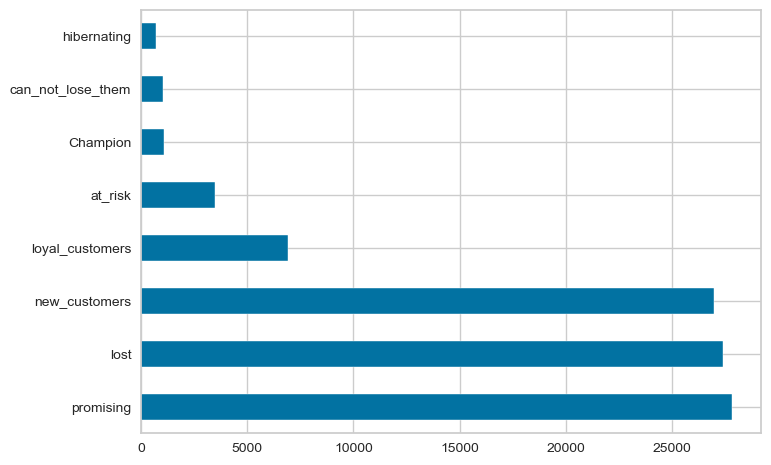

In [89]:
rfm_reviews.segment.value_counts().plot(kind='barh')

In [91]:
_ = pd.crosstab(rfm_reviews['segment'],rfm_reviews['cluster'])
_

cluster,0,1,2,3,4
segment,,,,,
Champion,0,233,22,48,796
at_risk,32,596,559,1073,1198
can_not_lose_them,0,246,30,36,725
hibernating,467,94,164,0,0
lost,8094,3114,6299,8079,1814
loyal_customers,23,1733,793,1558,2810
new_customers,7922,2646,5740,8931,1736
promising,7601,4684,6415,7680,1426


[]

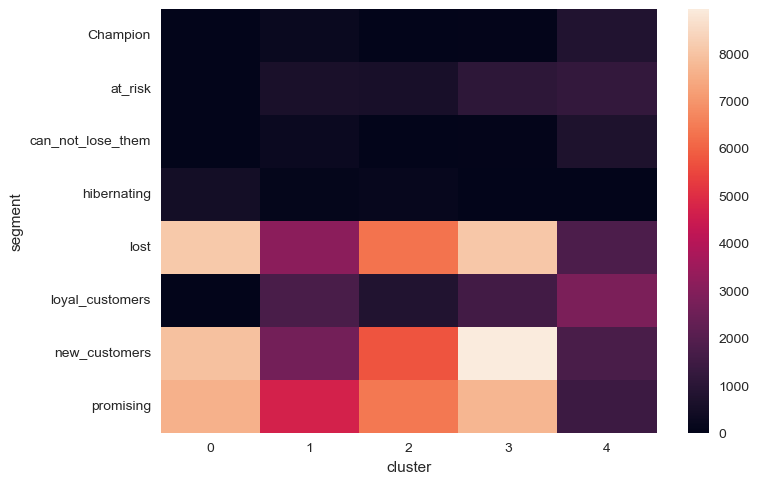

In [93]:
sns.heatmap(_, annot=False)
plt.plot()